### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
path = '/Users/bobbi/Careerfoundry/Shipping_project/02 Data/Prepared Data'

# Import port data
port_data = pd.read_pickle(os.path.join(path, 'world_ports.pkl'))

# Import world trade data
port_trade = pd.read_pickle(os.path.join(path, 'port_trade_data.pkl'))

In [4]:
port_data.head()

,countryareaCode,country,vesselTypeCode,vessel_type,flowCode,flowDesc,date,num_pc,mtc,dwt,num_pc_ma,mtc_ma,dwt_ma
0,136,Cayman Isds,0,Total,X,Exports,2015-05-06,0,0.0,0,0.133,0.0,903.4
1,136,Cayman Isds,0,Total,X,Exports,2015-05-07,0,0.0,0,0.133,0.0,903.4
2,136,Cayman Isds,0,Total,X,Exports,2015-05-08,0,0.0,0,0.133,0.0,903.4
3,136,Cayman Isds,0,Total,X,Exports,2015-05-09,0,0.0,0,0.133,0.0,903.4
4,136,Cayman Isds,0,Total,X,Exports,2015-05-10,0,0.0,0,0.133,0.0,903.4


In [5]:
port_trade.head()

,year_month,country,flowCode,vessel_type,num_pc,mtc,dwt,num_pc_ma,mtc_ma,dwt_ma,date,flowDesc,motDesc,cifvalue,fobvalue,primaryValue,year
0,2015-04,Angola,M,Total,108,1.286615e+06,2505197,104.532,1.324698e+06,2.610117e+06,2015-04-01,Import,Water,1.500000e+03,1.250000e+03,1.500000e+03,2015
1,2015-04,Angola,M,Total,108,1.286615e+06,2505197,104.532,1.324698e+06,2.610117e+06,2015-04-01,Import,Sea,1.413374e+09,1.302496e+09,1.413374e+09,2015
2,2015-04,Angola,X,Total,47,8.583139e+04,2420752,43.330,7.067917e+04,2.185129e+06,2015-04-01,Export,Sea,0.000000e+00,3.210582e+09,3.210582e+09,2015
3,2015-04,Benin,X,Total,18,0.000000e+00,592778,14.335,0.000000e+00,4.668884e+05,2015-04-01,Export,Sea,0.000000e+00,6.806180e+07,6.806180e+07,2015
4,2015-04,Brazil,X,Total,998,5.223796e+07,46398718,1015.666,5.088110e+07,4.775085e+07,2015-04-01,Export,Water,NaN,1.338799e+08,1.338799e+08,2015


We are going to use port values and primaryValue for the k_means analysis.

In [6]:
# Divide data in subsets: import/ export
# Import
import_port = port_data[port_data['flowCode'] == "M"]

# Export
export_port = port_data[port_data['flowCode'] == "X"]

In [7]:
import_port.columns

Index(['countryareaCode', 'country', 'vesselTypeCode', 'vessel_type',
       'flowCode', 'flowDesc', 'date', 'num_pc', 'mtc', 'dwt', 'num_pc_ma',
       'mtc_ma', 'dwt_ma'],
      dtype='object')

In [8]:
df_import = port_trade.drop(columns = ['country', 'flowCode', 'vessel_type', 'num_pc_ma', 'mtc_ma', 'dwt_ma', 'date', 'flowDesc', 'cifvalue', 'fobvalue', 'motDesc', 'year'])

df_export = port_trade.drop(columns = ['country', 'flowCode', 'vessel_type', 'num_pc_ma', 'mtc_ma', 'dwt_ma', 'date', 'flowDesc', 'cifvalue', 'fobvalue', 'motDesc', 'year'])

In [9]:
print(df_import)
print(df_export)

     year_month  num_pc           mtc       dwt  primaryValue
0       2015-04     108  1.286615e+06   2505197  1.500000e+03
1       2015-04     108  1.286615e+06   2505197  1.413374e+09
2       2015-04      47  8.583139e+04   2420752  3.210582e+09
3       2015-04      18  0.000000e+00    592778  6.806180e+07
4       2015-04     998  5.223796e+07  46398718  1.338799e+08
...         ...     ...           ...       ...           ...
3696    2024-11     167  9.462702e+05   2047639  1.155573e+10
3697    2024-12      17  2.167980e+05    810603  9.605138e+09
3698    2024-12       8  4.946161e+04     73969  4.960803e+08
3699    2024-12      96  6.470610e+05   2148890  1.627994e+10
3700    2024-12     143  1.345918e+06   2905950  2.194366e+10

[3701 rows x 5 columns]
     year_month  num_pc           mtc       dwt  primaryValue
0       2015-04     108  1.286615e+06   2505197  1.500000e+03
1       2015-04     108  1.286615e+06   2505197  1.413374e+09
2       2015-04      47  8.583139e+04   24207

#### Standardize data

In [10]:
# Select features for clustering
features = ['num_pc', 'mtc', 'dwt', 'primaryValue']
X_import = df_import[features]
X_export = df_export[features]

# Standardize the data
scaler = StandardScaler()
X_scaled_im = scaler.fit_transform(X_import)
X_scaled_ex = scaler.fit_transform(X_export)

#### Elbow technique

In [11]:
# Imports 
num_cl_i = range(1, 10) 
kmeans_i = [KMeans(n_clusters=i) for i in num_cl_i]

score_i = [kmeans_i[i].fit(X_scaled_im).score(X_scaled_im) for i in range(len(kmeans_i))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score_i

[-14804.000000000002,
 -5716.11887469449,
 -3400.5892809911497,
 -2471.8029514853797,
 -1933.2197181216611,
 -1654.477841775124,
 -1405.08213398232,
 -1237.9710908511868,
 -1103.0738083848132]

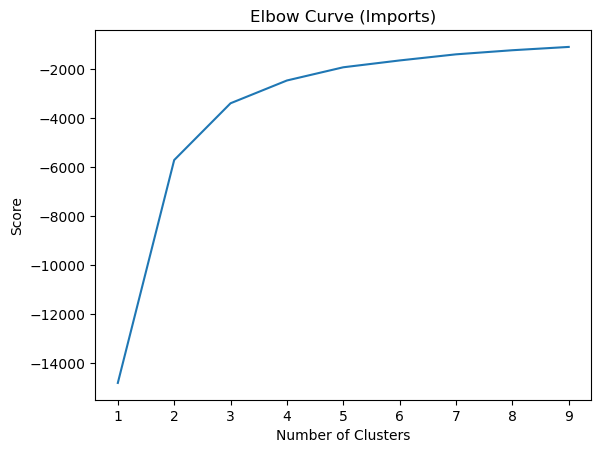

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl_i,score_i)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve (Imports)')
pl.show()

In [13]:
# Exports 
num_cl_e = range(1, 10) 
kmeans_e = [KMeans(n_clusters=i) for i in num_cl_e]

score_e = [kmeans_e[i].fit(X_scaled_ex).score(X_scaled_ex) for i in range(len(kmeans_e))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score_e

[-14804.000000000002,
 -5716.166099176469,
 -3400.5792848436067,
 -2471.8029514853797,
 -1933.29455482612,
 -1739.2444306416019,
 -1463.2855077328609,
 -1232.1392128470952,
 -1148.4281906913109]

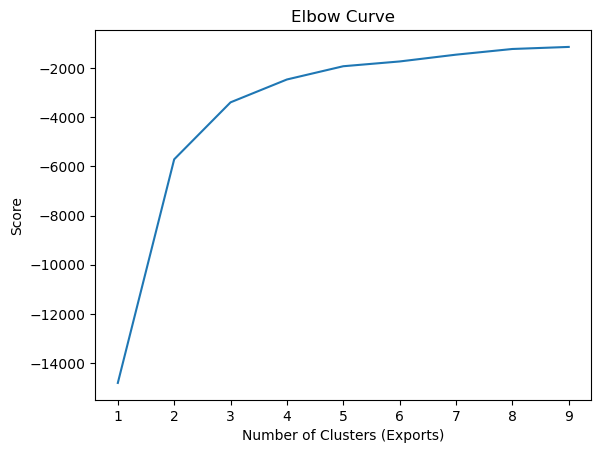

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl_e,score_e)
pl.xlabel('Number of Clusters (Exports)')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In both datasets, there's a large jump from two to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is four. I am going to continue the cluster analysis with import dataset

#### Clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [16]:
# Fit the k-means object to the data.

kmeans.fit(X_scaled_im)

KMeans(n_clusters=4)

In [17]:
# Get cluster labels
cluster_labels = kmeans.predict(X_scaled_im)

# Store them in df_import
df_import['clusters'] = cluster_labels

In [18]:
df_import.head()

,year_month,num_pc,mtc,dwt,primaryValue,clusters
0,2015-04,108,1.286615e+06,2505197,1.500000e+03,0
1,2015-04,108,1.286615e+06,2505197,1.413374e+09,0
2,2015-04,47,8.583139e+04,2420752,3.210582e+09,0
3,2015-04,18,0.000000e+00,592778,6.806180e+07,0
4,2015-04,998,5.223796e+07,46398718,1.338799e+08,3


In [19]:
df_import['clusters'].value_counts()

clusters
0    2486
2     598
1     479
3     138
Name: count, dtype: int64

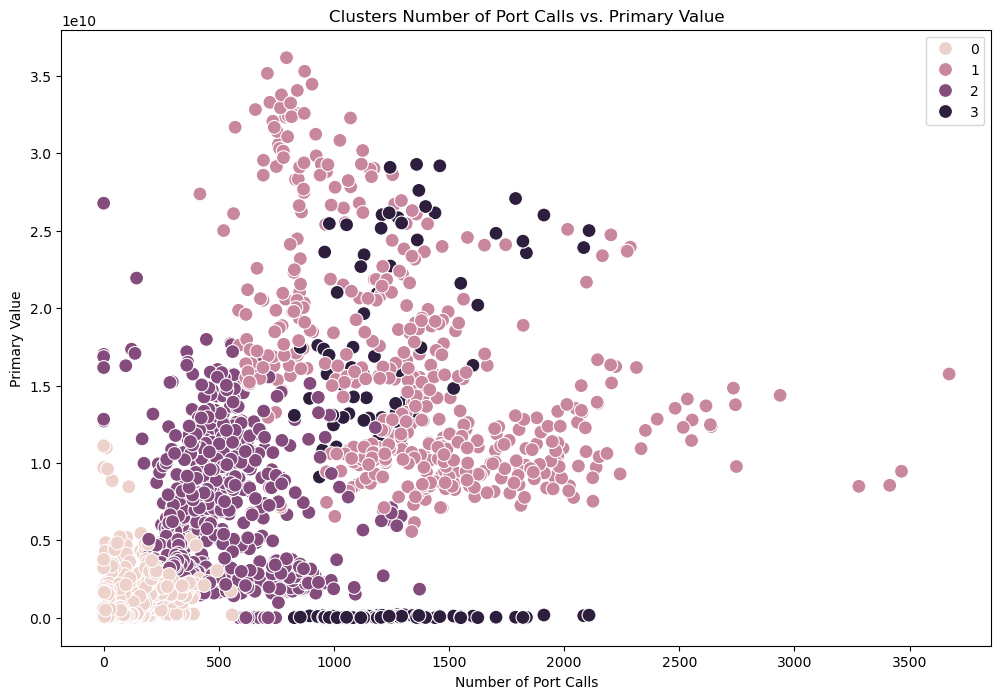

In [20]:
# Plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_import['num_pc'], y=df_import['primaryValue'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.title('Clusters Number of Port Calls vs. Primary Value')
plt.xlabel('Number of Port Calls') 
plt.ylabel('Primary Value') 
plt.savefig('/Users/bobbi/Careerfoundry/Shipping_project/04 Analysis/Visualizations/trade_cluster.png', dpi=300, bbox_inches='tight')

plt.show()

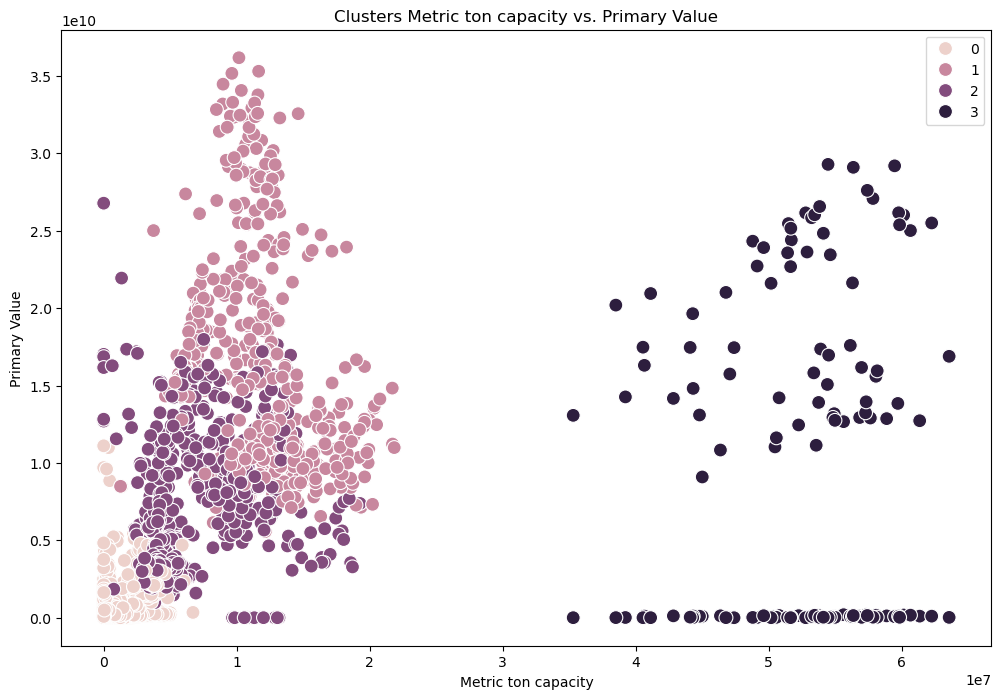

In [21]:
# Plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_import['mtc'], y=df_import['primaryValue'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.title('Clusters Metric ton capacity vs. Primary Value')
plt.xlabel('Metric ton capacity') 
plt.ylabel('Primary Value') 
plt.savefig('/Users/bobbi/Careerfoundry/Shipping_project/04 Analysis/Visualizations/mtc_cluster.png', dpi=300, bbox_inches='tight')

plt.show()

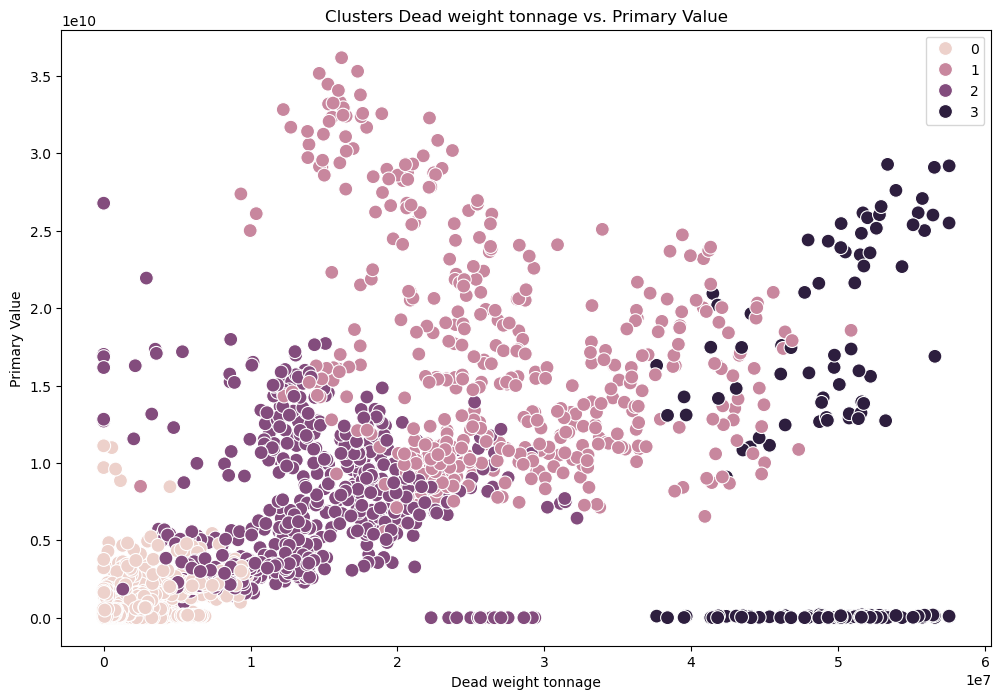

In [22]:
# Plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_import['dwt'], y=df_import['primaryValue'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.title('Clusters Dead weight tonnage vs. Primary Value')
plt.xlabel('Dead weight tonnage') 
plt.ylabel('Primary Value') 
plt.show()

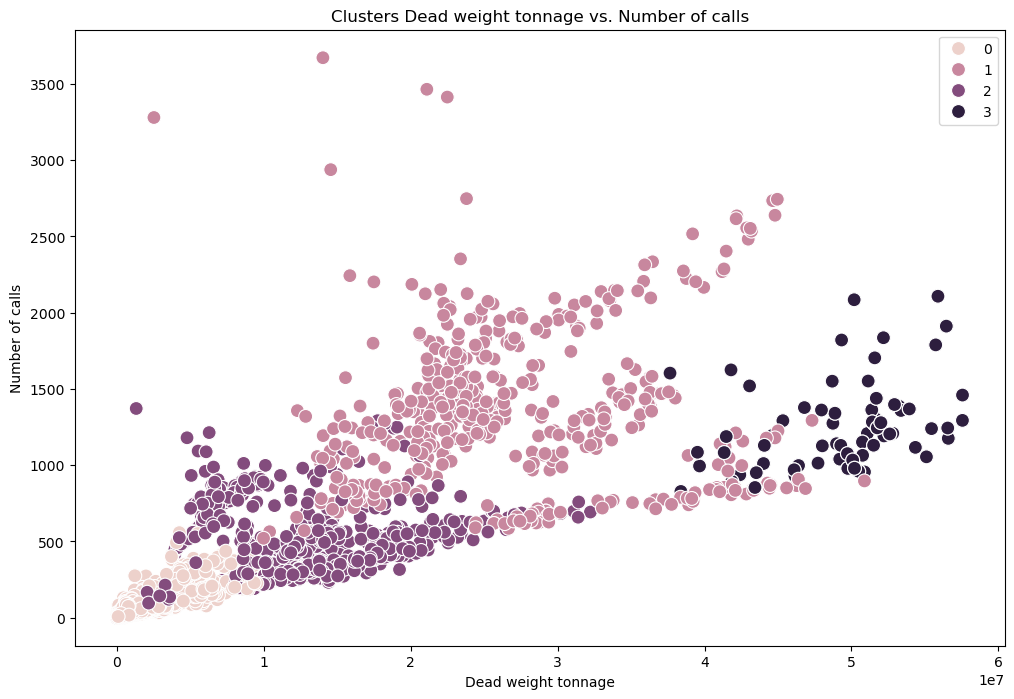

In [23]:
# Plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_import['dwt'], y=df_import['num_pc'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.title('Clusters Dead weight tonnage vs. Number of calls')
plt.xlabel('Dead weight tonnage') 
plt.ylabel('Number of calls') 
plt.show()

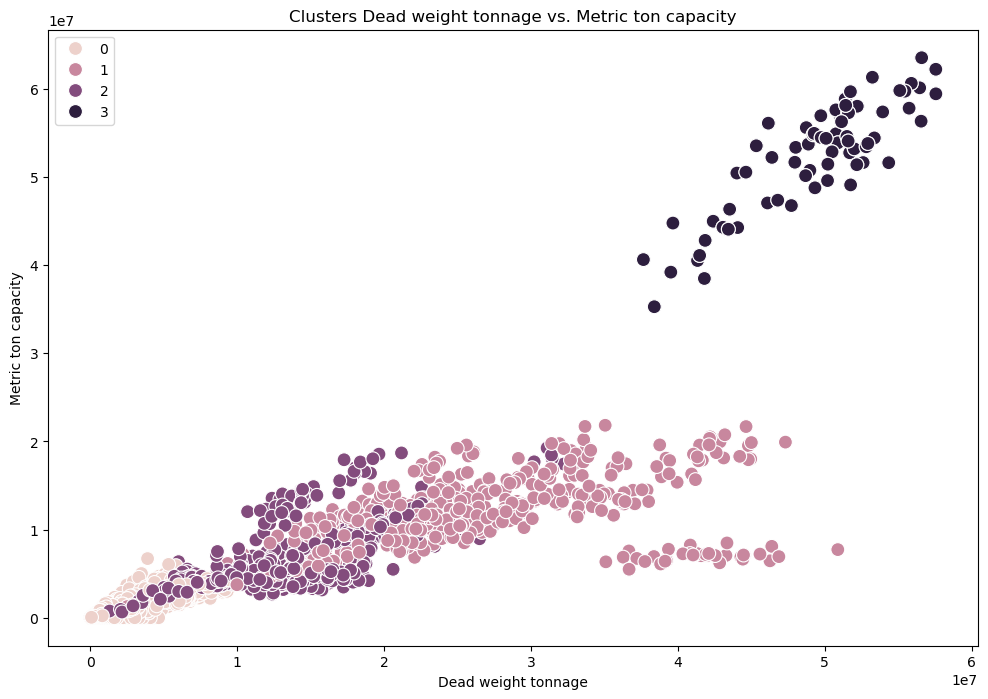

In [24]:
# Plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_import['dwt'], y=df_import['mtc'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.title('Clusters Dead weight tonnage vs. Metric ton capacity')
plt.xlabel('Dead weight tonnage') 
plt.ylabel('Metric ton capacity') 
plt.show()

**Visual Interpretation**
- Pink represents the smallest ranges for both capacity and trade value across all comparisons. This cluster likely corresponds to smaller-scale operations involving low-capacity vessels and lower overall trade value.
- Purple typically shows higher numbers of port calls or vessel capacity, paired with moderate trade values. These routes might balance volume and value without reaching the extremes seen in other clusters.
- Dark Purple features fewer port calls but stands out for exceptionally high trade values. This indicates a focus on fewer, high-value shipments that command significant attention despite lower frequency.
- Black spans higher capacities and frequent port calls yet falls below the dark purple segment in total trade value. These routes are characterized by substantial throughput but more moderate shipment values.
- Collectively, these four groupings suggest distinct patterns in shipping behavior, ranging from small-scale low-value operations to large-capacity or high-frequency routes with varying trade values.

**Takeaways**
1. Varied shipping profiles 

   The clustering highlights that shipping operations differ significantly in terms of capacity, frequency, and trade value. Some routes handle large volumes of lower-value goods, while others specialize in high-value cargo with fewer calls, indicating multiple operational strategies within the industry.

2. Differentiating high value from high volume

   Certain clusters demonstrate “high” metrics in different ways. The dark purple cluster focuses on fewer but high-value shipments, whereas the black cluster manages larger capacities and more frequent calls but at a somewhat lower trade value. This distinction underscores the importance of distinguishing between value-driven and volume-driven approaches in shipping.

3. Strategic resource allocation
     
   Identifying these segments can help companies and ports optimize resources, from infrastructure investments to staffing and security measures. High-volume, lower-value routes might need efficient handling capacities, while fewer high-value calls may demand specialized facilities or tighter security protocols.

4. Importance of smaller segments

   The pink cluster, which features lower calls, capacity, and trade value, may represent niche or localized routes still vital to certain regions or market segments. Recognizing and supporting these smaller operations can ensure comprehensive coverage and balanced development within the broader shipping network.


The visualizations indicate that sea import shipping data from UN Comtrade naturally clusters into distinct segments. Some routes are characterized by smaller-scale, low-value shipments, while others exhibit higher frequency with moderate trade values or fewer calls with high-value cargo. These patterns reflect varying operational strategies and suggest that different shipping lanes require tailored infrastructure and logistics planning.

In [25]:
df_import.loc[df_import['clusters'] == 3, 'cluster'] = 'black'
df_import.loc[df_import['clusters'] == 2, 'cluster'] = 'dark purple'
df_import.loc[df_import['clusters'] == 1, 'cluster'] = 'purple'
df_import.loc[df_import['clusters'] == 0, 'cluster'] = 'pink'

In [26]:
df_import.head()

,year_month,num_pc,mtc,dwt,primaryValue,clusters,cluster
0,2015-04,108,1.286615e+06,2505197,1.500000e+03,0,pink
1,2015-04,108,1.286615e+06,2505197,1.413374e+09,0,pink
2,2015-04,47,8.583139e+04,2420752,3.210582e+09,0,pink
3,2015-04,18,0.000000e+00,592778,6.806180e+07,0,pink
4,2015-04,998,5.223796e+07,46398718,1.338799e+08,3,black


In [27]:
df_import.groupby('cluster').agg({'num_pc':['mean', 'median'],
                                  'mtc': ['mean', 'median'],
                                  'dwt': ['mean', 'median'],
                                  'primaryValue': ['mean', 'median']})

num_pc                   mtc                         dwt  \
                    mean  median          mean        median          mean   
cluster                                                                      
black        1260.246377  1208.0  5.235385e+07  5.355669e+07  4.927951e+07   
dark purple   523.356187   490.5  6.915406e+06  5.318293e+06  1.363723e+07   
pink           71.016895    51.0  6.908283e+05  3.080302e+05  1.691124e+06   
purple       1352.515658  1316.0  1.201255e+07  1.175513e+07  2.669222e+07   

                         primaryValue                
                 median          mean        median  
cluster                                              
black        50207107.0  9.480830e+09  4.643872e+09  
dark purple  13228146.5  7.122011e+09  6.360956e+09  
pink          1109545.0  5.712079e+08  2.210427e+08  
purple       24685699.0  1.618792e+10  1.483448e+10

Pink Cluster (Cluster 0)
This cluster displays moderate figures across all metrics. The average number of port calls (≈ 523) is higher than in the dark purple group but still below the black and purple clusters. Likewise, the mean capacity (mtc ≈ 6.92 × 10^6; dwt ≈ 1.36 × 10^7) and trade value (≈ 7.12 × 10^9) fall into a middle range, suggesting mid‐scale operations that balance volume and value without reaching either extreme.

Key stats:
- Port calls (num_pc) mean: 523.36; median: 490.5  
- Metric ton capacity (mtc) mean: 6.92 × 10^6  
- Dead weight tonnage (dwt) mean: 1.36 × 10^7  
- Primary value mean: 7.12 × 10^9  

---

Purple Cluster (Cluster 1)
Among the four clusters, purple stands out for having the highest average number of port calls (≈ 1,353) and the largest mean trade value (≈ 1.62 × 10^10). While its mean capacity is not as high as black’s, it remains substantial (mtc ≈ 1.20 × 10^7; dwt ≈ 2.67 × 10^7). This profile points to busy routes that handle frequent shipments with a high overall trade value.

Key stats:
- Port calls (num_pc) mean: 1,352.52; median: 1,316.0  
- Metric ton capacity (mtc) mean: 1.20 × 10^7  
- Dead weight tonnage (dwt) mean: 2.67 × 10^7  
- Primary value mean: 1.62 × 10^10  

---

Dark Purple Cluster (Cluster 2)
Dark purple represents the smallest scale across every metric. It has the fewest port calls (≈ 71), the lowest capacity (mtc ≈ 6.91 × 10^5; dwt ≈ 1.69 × 10^6), and the lowest mean trade value (≈ 5.71 × 10^8). This suggests routes or vessels that handle relatively minimal cargo volume and value, possibly serving highly specialized or local operations.

Key stats:
- Port calls (num_pc) mean: 71.02; median: 51.0  
- Metric ton capacity (mtc) mean: 6.91 × 10^5  
- Dead weight tonnage (dwt) mean: 1.69 × 10^6  
- Primary value** mean: 5.71 × 10^8  

Black Cluster (Cluster 3)
This cluster is notable for having the largest mean capacity (mtc ≈ 5.24 × 10^7; dwt ≈ 4.93 × 10^7). It also has a high average number of port calls (≈ 1,260), second only to purple, and a mean trade value (≈ 9.48 × 10^9) that is substantial but still below the purple cluster. These figures suggest large‐throughput routes moving considerable volumes of cargo at a solid, though not top‐tier, trade value.

Key stats:
- Port calls (num_pc) mean: 1,260.25; median: 1,208.0  
- Metric ton capacity (mtc) mean: 5.24 × 10^7  
- Dead weight tonnage (dwt) mean: 4.93 × 10^7  
- Primary value mean: 9.48 × 10^9  


**Future steps**

These findings are only a starting point for more in-depth research. A logical next step is to examine geographical patterns - mapping clusters to specific routes, regions or port hubs to see if certain clusters dominate particular trade lanes or continents. In addition, seasonal trends could be revealing, as many industries (e.g. agriculture, retail) have peak shipping periods at certain times of the year; re-running the clustering on a monthly or quarterly basis could show how clusters shift with demand cycles. Another avenue is to examine variation at the ship level, such as ship type, age or ownership, to see if different ship characteristics correlate strongly with particular clusters.

In addition to these extensions, validating the cluster assignments with domain expertise and business metrics is critical to ensure that the groupings remain operationally relevant. This could include cross-referencing each cluster's routes or vessels with financial performance, service reliability or safety records. In addition, the inclusion of data from supply chain partners, such as commodity level details, could clarify why certain routes have high value despite fewer calls, or vice versa. Ultimately, a combination of deeper data (e.g. cargo type, regional regulations) and ongoing feedback from stakeholders (e.g. shipping lines, port authorities) will confirm whether the clusters are actionable - or whether further refinement through additional modelling or different clustering techniques is required.

In [28]:
df_import.to_csv(os.path.join(path, 'cluester.csv'))